In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

monthly = pd.read_csv("Bus_monthly(weekday,weekend,total).csv")

In [34]:
def clean(monthly):
    # Adding Year to the file
    monthly['year'] = pd.DatetimeIndex(monthly['Month_Beginning']).year
    # Adding Month to the file
    monthly['month'] = pd.DatetimeIndex(monthly['Month_Beginning']).month
    #Leap year Adjustment
    for i in range(0, len(monthly.index)):
        if((monthly.at[i,'month'] == 2) & (monthly.at[i,'year']  in ([2000, 2004, 2008, 2012, 2016, 2020]))):
            monthly.at[i,'MonthTotal'] = (monthly.at[i,'MonthTotal'] * 365)/366
    return(monthly)
clean(monthly)

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal,year,month
0,1,Indiana/Hyde Park,01/01/2001,6982.6,0.0,0.0,153617,2001,1
1,2,Hyde Park Express,01/01/2001,1000.0,0.0,0.0,22001,2001,1
2,3,King Drive,01/01/2001,21406.5,13210.7,8725.3,567413,2001,1
3,4,Cottage Grove,01/01/2001,22432.2,17994.0,10662.2,618796,2001,1
4,6,Jackson Park Express,01/01/2001,18443.0,13088.2,7165.6,493926,2001,1
...,...,...,...,...,...,...,...,...,...
31435,172,U. of Chicago/Kenwood,12/01/2019,1435.9,396.8,281.8,33432,2019,12
31436,192,U. of Chicago Hospitals Express,12/01/2019,606.3,0.0,0.0,12732,2019,12
31437,201,Central/Ridge,12/01/2019,1902.8,936.4,0.0,43705,2019,12
31438,206,Evanston Circulator,12/01/2019,507.5,0.0,0.0,10657,2019,12


In [35]:
def routes_drastic_change(monthly):
    # Grouping by route 
    route_group = monthly.groupby(['route'],as_index=False).count()
    # For All the routes which ran all the months of 19 years
    route_group = route_group.loc[route_group.routename == 228]
    # List of All such groups
    route_groups = route_group['route'].tolist()
    # DF with only such routes
    monthly_reg = monthly.loc[monthly['route'].isin(route_groups)]
    # All regular routes grouped by route and year
    group_route_year = monthly_reg.groupby(['route','year'],as_index = False).mean()
    #Normalizing all the Average Rides with respect to 2001
    normalized_avg = group_route_year
    for i in range (0,103):
        j = i*19
        avg_2001 = normalized_avg.at[j,'Avg_Weekday_Rides']
        for k in range (j, j+19):
            if(normalized_avg.at[k,'Avg_Weekday_Rides']>avg_2001):
                normalized_avg.at[k,'Avg_Weekday_Rides'] = normalized_avg.at[k,'Avg_Weekday_Rides']/avg_2001
            else:
                normalized_avg.at[k,'Avg_Weekday_Rides'] = avg_2001/normalized_avg.at[k,'Avg_Weekday_Rides']
    for i in range(0,103):
        j = i*19
        for k in range(j, j+19):
            normalized_avg.at[k,'Avg_Weekday_Rides'] = (1-normalized_avg.at[k,'Avg_Weekday_Rides'])*(1-normalized_avg.at[k,'Avg_Weekday_Rides'])
    max5 = []
    max_of_all = []
    for j in range(0,103):
        k = j*19
        max_local = 0
        for l in range(k, k+19):
            a = normalized_avg.at[l,'Avg_Weekday_Rides']
            if(a>max_local):
                max_local = a
        max_of_all.append(max_local)
    max_of_all2 = max_of_all.copy()
    for i in range(0,10):
        max_of5 = 0
        for m in range(0,len(max_of_all)):
            if(max_of_all[m]>max_of5):
                max_of5 = max_of_all[m]
        max_of_all.remove(max_of5)
        max5.append(max_of5)
    indexes = []
    for i in range(0,len(max5)):
        indexes.append(max_of_all2.index(max5[i]))
    route_list = [route_groups[i] for i in indexes]
    print(route_list) #All the regular routes with most drastic change in descending order of drasticity
    return route_list
routes_drastic_change(monthly)

['169', '1', '51', '2', '108', '171', '11', '28', '120', '100']


['169', '1', '51', '2', '108', '171', '11', '28', '120', '100']

7.209120829161296


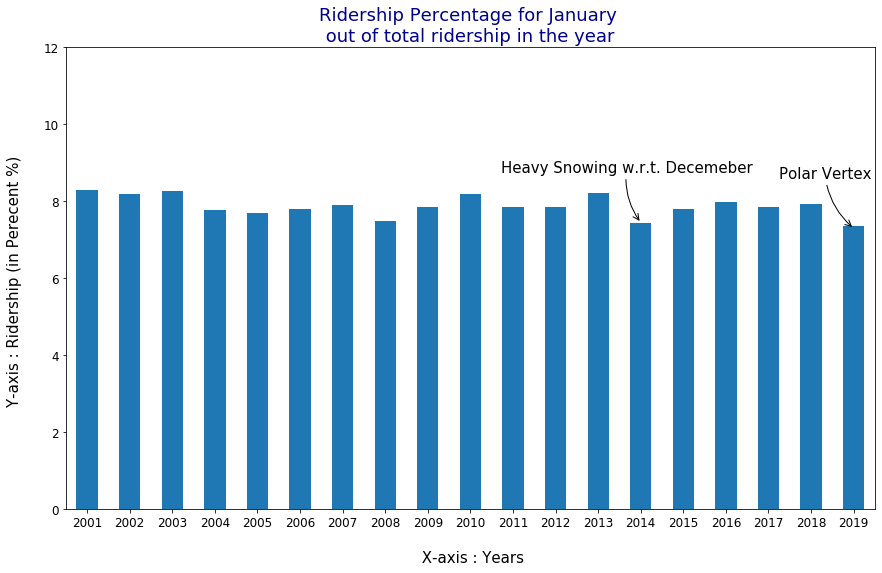

In [36]:
def polar_vertex(monthly):
    #Finding Trend for Polar Vertex
    import seaborn as sns
    #Selecting for the month of January
    winter_df = monthly.loc[(monthly.month == 1)]
    year_df = monthly.groupby(['year'],as_index = False).sum()
    #Grouping Based on Year and then Month
    winter_df = winter_df.groupby(['year','month'],as_index = False).sum()
    # Finding Share of month of January out of Total Ridership in the year
    winter_df['percentage_share'] =  winter_df.MonthTotal*100/year_df.MonthTotal
    jan_1819 = winter_df.loc[(winter_df.year == 2018) | (winter_df.year == 2019)]
    diff = (jan_1819.at[17,'percentage_share'] - jan_1819.at[18,'percentage_share'])*100/jan_1819.at[17,'percentage_share']
    print(diff) #Difference between percentage share of JAN 2018 and JAN 2019 (Polar Vertex)
    ax = winter_df.plot.bar(x = 'year',y='percentage_share',legend = False)
    fig = plt.gcf()
    plt.xticks(fontsize =12,rotation='horizontal')
    plt.yticks(fontsize = 12)
    fig.set_size_inches(14.5, 8.5)
    fig.savefig('test1png.png', dpi=100)
    plt.ylim(0,12)
    plt.title('Ridership Percentage for January \n out of total ridership in the year ',loc='center',fontsize = 18,color = 'darkblue')
    plt.xlabel('\n X-axis : Years', fontsize =15)
    plt.ylabel('Y-axis : Ridership (in Perecent %) \n ', fontsize =15)
    plt.annotate("Heavy Snowing w.r.t. Decemeber",(13,7.45),clip_on=True,textcoords="offset points",xytext=(-140,+50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",color = 'black'),fontsize=15)
    plt.annotate("Polar Vertex",(18,7.3),textcoords="offset points",xytext=(-75,+50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",color = 'black'),fontsize=15)
    return (ax)
polar_vertex(monthly)

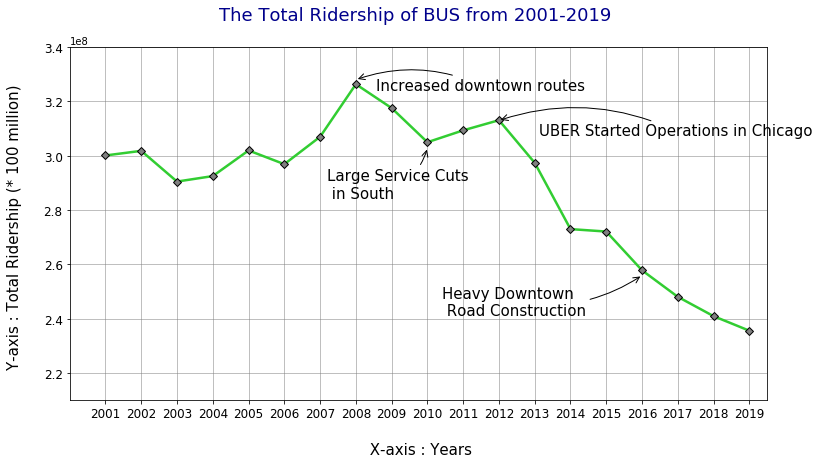

In [37]:
def Overall_graph_bus(monthly):
    year_df = monthly.groupby(['year'],as_index = False).sum()
    ax = year_df.plot.line(x='year',y = 'MonthTotal',linewidth=2.5, marker = 'D',color = 'limegreen',mec = 'black',mfc = 'gray',legend = False)
    fig = plt.gcf()
    x = year_df.year
    plt.xticks(x,fontsize =12)
    plt.yticks(fontsize = 12)
    fig.set_size_inches(12.5, 6.5)
    fig.savefig('1.png', dpi=100)
    plt.grid(color='gray', linestyle='-', linewidth=.5)
    plt.xlim(2000,2019.5)
    plt.ylim(210000000,340000000)
    plt.title('The Total Ridership of BUS from 2001-2019 \n ',loc='center',fontsize = 18,color = 'darkblue')
    plt.xlabel('\n X-axis : Years', fontsize =15)
    plt.ylabel('Y-axis : Total Ridership (* 100 million) \n ', fontsize =15)
    plt.annotate("Increased downtown routes",(2008,328000000),textcoords="offset points",xytext=(+20,-10),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
    plt.annotate("Large Service Cuts \n in South",(2010,303000000),textcoords="offset points",xytext=(-100,-50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
    plt.annotate("UBER Started Operations in Chicago",(2012,313000000),textcoords="offset points",xytext=(+40,-15),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
    plt.annotate("Heavy Downtown \n Road Construction",(2016,256000000),textcoords="offset points",xytext=(-200,-40),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
    return(ax)
Overall_graph_bus(monthly)

Correlation between Gas prices and Bus Ridership is  0.09493865538035208


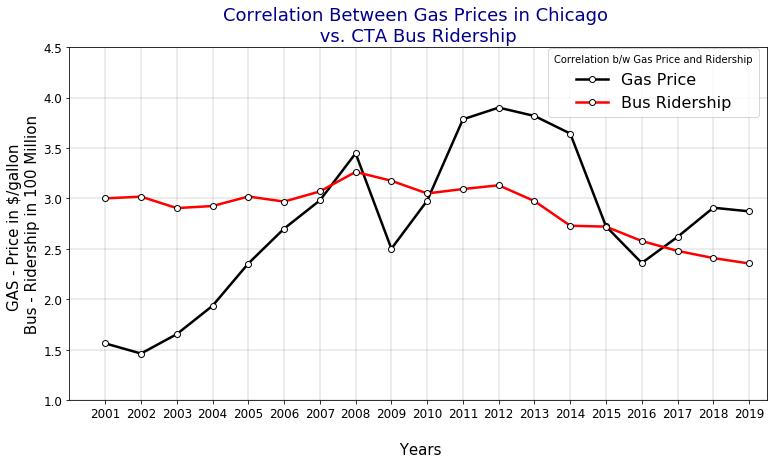

In [38]:
def gasvsbus(gas,monthly):
    #variation of GAS price in Chicago over the years
    year_df = monthly.groupby(['year'],as_index = False).sum()
    gas['year'] = pd.DatetimeIndex(gas['Date']).year
    gas = gas.loc[~gas.year.isin([2000,2020])]
    gas.reset_index(inplace = True, drop = True)
    gas = gas.groupby(['year'],as_index = False).mean()

    #Co-relation of GAS prices and Ridreship
    a = year_df.MonthTotal
    b = gas.Price
    c = a.corr(b)
    print("Correlation between Gas prices and Bus Ridership is ",c)

    ax = gas.plot.line(x = 'year',y = 'Price' ,linewidth=2.5, marker = 'o',color = 'black',mfc = 'white')
    year_df['MonthTotal1'] = year_df.MonthTotal/100000000
    year_df.plot.line(x='year',y = 'MonthTotal1',ax = ax,linewidth=2.5, marker = 'o',color = 'red',mec = 'black',mfc = 'white')
    fig = plt.gcf()
    x = year_df.year
    plt.xticks(x,fontsize =12)
    plt.yticks(fontsize = 12)
    fig.set_size_inches(12.5, 6.5)
    fig.savefig('2.png', dpi=100)
    plt.xlim(2000,2019.5)
    plt.ylim(1,4.5)
    plt.grid(color='gray', linestyle='-', linewidth=.3)
    plt.legend(loc= 'center right',title = "Correlation b/w Gas Price and Ridership",labels = ['Gas Price','Bus Ridership'],bbox_to_anchor=(1, .9),fontsize = 16)
    plt.title('Correlation Between Gas Prices in Chicago \n vs. CTA Bus Ridership ',loc='center',fontsize = 18,color = 'darkblue')
    plt.xlabel('\n Years', fontsize =15)
    plt.ylabel('GAS - Price in $/gallon \n Bus - Ridership in 100 Million ', fontsize =15)
    plt.show()
    return(ax)
gas = pd.read_csv('gas.csv')
gasvsbus(gas,monthly)

In [99]:
def all_monthly_ml(monthly):
    import statsmodels.formula.api as smf
    #Supervised Machine Learning to predcit the ridership over the years using Long Short-term Memory (LSTM)
    month_sum = monthly.groupby(['year','month'],as_index= False).sum()
    month_sum['date'] = pd.to_datetime(month_sum[['year', 'month']].assign(DAY=1))
    some = month_sum.loc[(month_sum.year == 2019) | (month_sum.year == 2018) | (month_sum.year == 2017)]
    month_sum['prev'] = month_sum['MonthTotal'].shift(1)
    month_sum = month_sum.dropna()
    month_sum['diff'] = month_sum['MonthTotal'] - month_sum['prev']
    # ax = month_sum.plot.line(x = 'date',y='diff')
    month_sum_spr = month_sum.drop(['prev','year','month','Avg_Weekday_Rides','Avg_Saturday_Rides','Avg_Sunday-Holiday_Rides'],axis=1)
    for inc in range(1,19):
        field_name = 'lag_' + str(inc)
        month_sum_spr[field_name] = month_sum_spr['diff'].shift(inc)
    month_sum_spr = month_sum_spr.dropna().reset_index(drop=True)
    model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4+ lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12 + lag_13 + lag_14 + lag_15 + lag_16 + lag_17  ', data=month_sum_spr)
    model_fit = model.fit()
    regression_adj_rsq = model_fit.rsquared_adj
    print(regression_adj_rsq)
    from sklearn.preprocessing import MinMaxScaler
    df_model = month_sum_spr.drop(['MonthTotal','date'],axis=1)
    train_set, test_set = df_model[0:-6].values, df_model[-6:].values
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)# reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout
    from keras.layers.recurrent import LSTM
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)
    y_pred = model.predict(X_test,batch_size=1)
    y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])#inverse transform
    pred_test_set_inverted = scaler.inverse_transform(pred_test_set)
    result_list = []
    dates = list(month_sum[-7:].date)
    train = list(month_sum[-7:].MonthTotal)
    for index in range(0,len(pred_test_set_inverted)):
        result_dict = {}
        result_dict['date'] = dates[index+1]
        print(pred_test_set_inverted[index][0])
        print(train[index])
        result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + train[index])
        result_list.append(result_dict)
    df_result = pd.DataFrame(result_list)
    print(df_result)
    return(month_sum, df_result)
month_sum, df_result = all_monthly_ml(monthly)

0.7511016974740673


/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 2s 8ms/step - loss: 0.0939
Epoch 2/100
203/203 [==============================] - 1s 2ms/step - loss: 0.0777
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0477
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0394
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0342
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0306
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0281
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0263
Epoch 10/100
203/203 [==============================] - 1s 2ms/step - loss: 0.0251
Epoch 11/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 12/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 13/100


203/203 [==============================] - 1s 3ms/step - loss: 0.0077
Epoch 100/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0076
-287176.8743693604
19641163
-372435.73919972393
19795631
1222907.9443770202
19751755
1410771.5832586589
20714013
-2855966.760512769
21650380
-469657.14945985365
19184385
        date  pred_value
0 2019-07-01    19353986
1 2019-08-01    19423195
2 2019-09-01    20974662
3 2019-10-01    22124784
4 2019-11-01    18794413
5 2019-12-01    18714727


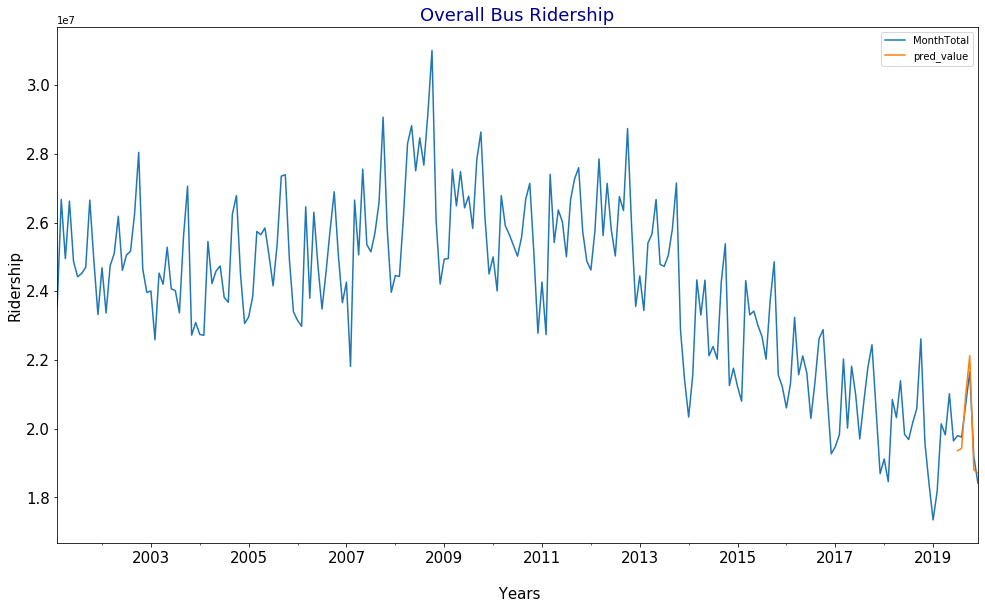

In [101]:
def graph_all_bus(month_sum, df_result):
    df_pred = pd.merge(month_sum,df_result,on='date',how='left')
    ax = df_pred.plot.line(x = 'date',y=['MonthTotal','pred_value'])
    fig = plt.gcf()
    plt.xticks(fontsize =15)
    plt.yticks(fontsize = 15)
    fig.set_size_inches(16.5, 9.5)
    plt.title('Overall Bus Ridership',loc='center',fontsize = 18,color = 'darkblue')
    plt.xlabel('\n Years', fontsize =15)
    plt.ylabel('Ridership', fontsize =15)
    fig.savefig('overall.png', dpi=100)
    
    return ax
graph_all_bus(month_sum,df_result)

In [103]:
def route_prediction(monthly):
    import statsmodels.formula.api as smf
    accuracy_list = []
    route = []
    pred19 = []
    act18 = []
    routes = list(monthly.route.unique())
    for i in range(0,137):
        #Supervised Machine Learning to predcit the ridership over the years using Long Short-term Memory (LSTM)
        monthlyx = monthly.loc[monthly.route == routes[i]].reset_index()
        month_sum = monthlyx.groupby(['year','month'],as_index= False).sum()
        month_sum['date'] = pd.to_datetime(month_sum[['year', 'month']].assign(DAY=1))
        some = month_sum.loc[(month_sum.year == 2019) | (month_sum.year == 2018) | (month_sum.year == 2017)]
        month_sum['prev'] = month_sum['MonthTotal'].shift(1)
        month_sum = month_sum.dropna()
        month_sum['diff'] = month_sum['MonthTotal'] - month_sum['prev']
        # ax = month_sum.plot.line(x = 'date',y='diff')
        month_sum_spr = month_sum.drop(['prev','year','month','Avg_Weekday_Rides','Avg_Saturday_Rides','Avg_Sunday-Holiday_Rides'],axis=1)
        for inc in range(1,19):
            field_name = 'lag_' + str(inc)
            month_sum_spr[field_name] = month_sum_spr['diff'].shift(inc)
        month_sum_spr = month_sum_spr.dropna().reset_index(drop=True)
        model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4+ lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12 + lag_13 + lag_14 + lag_15 + lag_16 + lag_17  ', data=month_sum_spr)
        model_fit = model.fit()
        regression_adj_rsq = model_fit.rsquared_adj
    #     print(regression_adj_rsq)
        if regression_adj_rsq < 0.6 :
            continue
        else:
            from sklearn.preprocessing import MinMaxScaler
            df_model = month_sum_spr.drop(['MonthTotal','date'],axis=1)
            train_set, test_set = df_model[0:-6].values, df_model[-6:].values
            #apply Min Max Scaler
            scaler = MinMaxScaler(feature_range=(-1, 1))
            scaler = scaler.fit(train_set)
            # reshape training set
            train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
            train_set_scaled = scaler.transform(train_set)# reshape test set
            test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
            test_set_scaled = scaler.transform(test_set)
            X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
            X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
            X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
            from keras.models import Sequential
            from keras.layers.core import Dense, Dropout
            from keras.layers.recurrent import LSTM
            model = Sequential()
            model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)
            y_pred = model.predict(X_test,batch_size=1)
            y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
            pred_test_set = []
            for index in range(0,len(y_pred)):
                pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
            pred_test_set = np.array(pred_test_set)
            pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])#inverse transform
            pred_test_set_inverted = scaler.inverse_transform(pred_test_set)
            result_list = []
            dates = list(month_sum[-6:].date)
            train = list(month_sum[-6:].MonthTotal)
            testclass = list(month_sum[-18:-12].MonthTotal)
            for index in range(0,len(pred_test_set_inverted)):
                result_dict = {}
                result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + train[index])
                result_dict['pred_value'] = result_dict['pred_value']/1.05
                result_dict['date'] = dates[index]
                result_list.append(result_dict)
            df_result = pd.DataFrame(result_list)
            accuracy = 0 
            for j in range (0,len(act_sales)):
                accuracy = ((accuracy*j)+((abs(act_sales[j]-df_result.pred_value[j]))/act_sales[j])*100)/(j+1)

            accuracy = 100 - accuracy
            if accuracy < 85:
                continue
            else:
                for j in range (0,len(act_sales)):
                    accuracy = ((abs(act_sales[j]-df_result.pred_value[j]))/act_sales[j])*100
                    accuracy = 100 - accuracy
                    route.append(routes[i])
                    pred19.append(df_result.pred_value[j])
                    accuracy_list.append(accuracy)
                act18.append(testclass)
    data18 = []
    for sublist in act18:
        for item in sublist:
            data18.append(item)
    final = pd.DataFrame(columns = ["route","pred19","act18","class","accuracy"])
    final.route = route
    final.pred19 = pred19
    final.act18 = data18
    final.accuracy = accuracy_list
    for l in range(0,len(final.route)):
        x = (final['pred19'][l])/(final['act18'][l])
        if x < .8:
            final['class'][l] = "Heavy Decrease"
        if x > 1.2:
            final['class'][l] = "Heavy Increase"
        if ((x >= .9) and (x <= 1.1 )):
            final['class'][l] = "Almost Same"
        if ((x >= .8) and (x< .9)):
            final['class'][l] = "Slight Decrease"
        if ((x > 1.1) and (x<= 1.2)):
            final['class'][l] = "Slight Decrease"
    final.pred19 = final.pred19.astype(int)
    months = ["July","August","September","Ocotber","November","December"]
    count_routes = len(final.route)//6
    months_final = []
    for i in range(0,count_routes):
        months_final.append(months)
    month_final = []
    for sublist in months_final:
        for item in sublist:
            month_final.append(item)
    final['month'] = month_final
    columns = ["month","route","pred19","act18","class","accuracy"]
    final = final[columns]
    final = final.rename(columns={'month': 'Month','pred19': 'Predicted_Ridership_2019','act18':'Ridership_2018', 'class': 'Classification','accuracy': 'Accuracy_of_Prediction'})
    final.to_csv('final_bus.csv', index=False)
    
    return (final)

route_prediction(monthly)
    

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3206
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3640
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3653
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3627
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3604
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3587
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3576
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3567
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3560
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3553
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3547
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3541
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.3699
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4171
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4009
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3907
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3838
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3789
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3751
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3721
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3696
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3675
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3657
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3642
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3119
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3767
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3777
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3734
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3698
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3670
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3649
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3632
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3618
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3605
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3593
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3583
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3278
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3822
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3798
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3736
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3684
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3641
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3604
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3569
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3534
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3496
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3451
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3396
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2959
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3639
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3252
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2966
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2671
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2325
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1933
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1585
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1404
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1335
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1277
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1223
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
179/179 [==============================] - 4s 23ms/step - loss: 0.2980
Epoch 2/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3463
Epoch 3/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3429
Epoch 4/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3379
Epoch 5/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3343
Epoch 6/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3317
Epoch 7/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3297
Epoch 8/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3281
Epoch 9/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3268
Epoch 10/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3258
Epoch 11/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3249
Epoch 12/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3241
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2750
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3774
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3408
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3112
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2811
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2503
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2276
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2190
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2073
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1920
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1763
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1609
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2686
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3366
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3000
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2586
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2120
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1751
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1559
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1431
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1327
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1234
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1153
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1085
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.3228
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3616
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3621
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3580
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3541
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3507
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3476
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3448
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3420
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3392
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3362
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3329
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.3188
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3793
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3654
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3550
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3467
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3384
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3287
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3153
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2939
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2544
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2090
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2078
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2281
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4426
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3974
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3838
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3759
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3705
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3663
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3630
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3600
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3574
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3550
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3528
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 22ms/step - loss: 0.2993
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3549
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3408
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3201
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2953
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2630
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2203
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1838
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1655
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1509
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1413
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1343
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
7/7 [==============================] - 4s 527ms/step - loss: 0.4733
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4298
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4158
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4072
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3994
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3918
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3844
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3769
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3695
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3622
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3548
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3474
Epoch 13/100
7/7 [==============================] - 0s 5ms/

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.2725
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4058
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3828
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3709
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3634
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3580
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3536
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3498
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3462
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3426
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3388
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3349
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.3332
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3600
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3593
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3559
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3524
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3488
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3446
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3394
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3328
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3242
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3118
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2895
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.2688
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4127
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3958
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3845
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3771
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3719
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3678
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3645
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3618
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3594
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3573
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3553
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.2818
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3902
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3784
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3699
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3644
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3605
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3576
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3552
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3532
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3514
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3497
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3481
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.3356
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3581
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3612
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3592
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3526
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3491
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3454
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3413
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3365
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3307
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3233
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.3229
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3420
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3386
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3294
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3172
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3014
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2801
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2528
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2266
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2096
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1939
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1787
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.2986
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3571
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3646
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3645
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3631
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3617
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3604
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3593
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3583
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3574
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3567
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.3337
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3597
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3612
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3581
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3549
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3521
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3495
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3469
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3442
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3413
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3379
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3341
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.2388
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3890
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3694
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3571
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3468
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3362
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3238
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3087
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2904
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2695
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2484
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2300
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 25ms/step - loss: 0.3361
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3733
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3750
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3719
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3687
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3661
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3639
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3619
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3601
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3584
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3567
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3550
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.3339
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3658
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3701
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3678
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3646
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3618
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3594
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3573
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3555
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3539
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3525
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3512
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 25ms/step - loss: 0.3112
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3828
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3782
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3712
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3662
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3627
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3600
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3579
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3562
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3546
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3532
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3518
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 25ms/step - loss: 0.3313
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3775
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3704
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3652
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3617
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3590
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3568
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3548
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3529
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3507
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3481
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3447
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 31ms/step - loss: 0.3328
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3981
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3860
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3764
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3699
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3653
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3619
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3591
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3568
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3548
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3529
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3510
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 26ms/step - loss: 0.3337
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3632
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3581
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3485
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3385
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3281
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3158
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2998
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2759
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2339
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1585
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1202
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 26ms/step - loss: 0.2878
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3953
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3792
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3719
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3676
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3648
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3628
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3613
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3602
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3592
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3584
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3577
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 26ms/step - loss: 0.3211
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4096
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3836
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3655
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3518
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3393
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3257
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3090
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2867
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2557
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2132
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1630
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 26ms/step - loss: 0.3285
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3677
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3646
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3570
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3492
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3407
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3308
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3180
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3006
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2760
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2436
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2146
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 27ms/step - loss: 0.3249
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3731
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3738
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3695
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3661
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3634
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3613
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3596
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3582
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3570
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3551
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 27ms/step - loss: 0.3339
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3638
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3670
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3652
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3628
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3606
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3588
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3573
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3548
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3538
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3528
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 5s 27ms/step - loss: 0.3412
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3636
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3636
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3599
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3567
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3540
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3518
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3498
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3480
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3461
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3442
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3420
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 27ms/step - loss: 0.2935
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3570
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3530
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3434
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3346
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3263
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3180
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3092
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2996
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2892
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2783
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2671
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 27ms/step - loss: 0.1172
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4664
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4132
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3997
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3915
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3858
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3815
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3780
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3750
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3726
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3705
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3686
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 28ms/step - loss: 0.3141
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3677
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3662
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3620
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3587
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3562
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3543
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3528
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3517
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3506
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3496
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3487
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 28ms/step - loss: 0.3367
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3503
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3548
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3559
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3555
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3549
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3542
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3534
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3526
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3517
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3507
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 28ms/step - loss: 0.3387
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3595
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3611
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3595
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3577
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3562
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3549
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3538
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3529
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3521
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3513
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3506
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 28ms/step - loss: 0.3386
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3605
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3670
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3657
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3626
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3595
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3566
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3539
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3514
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3489
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3464
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3437
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 29ms/step - loss: 0.3323
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3788
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3739
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3690
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3656
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3631
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3612
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3596
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3582
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3570
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3558
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3547
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 29ms/step - loss: 0.3193
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3576
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3616
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3580
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3531
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3479
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3422
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3356
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3275
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3169
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3032
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2895
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 29ms/step - loss: 0.3389
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3579
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3620
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3610
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3589
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3567
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3548
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3529
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3511
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3493
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3473
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3449
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 29ms/step - loss: 0.3099
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3524
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3537
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3490
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3437
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3383
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3326
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3261
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3187
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3103
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3012
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2918
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 0.2240
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4182
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3917
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3787
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3704
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3642
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3593
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3552
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3514
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3477
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3441
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3402
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 0.3533
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3873
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3819
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3739
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3672
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3615
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3566
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3520
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3476
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3429
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3380
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3324
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 0.3203
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3617
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3597
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3566
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3536
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3508
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3481
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3455
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3426
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3395
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3359
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 0.3183
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3552
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3573
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3530
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3478
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3427
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3373
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3314
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3244
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3158
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3047
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2899
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 31ms/step - loss: 0.3148
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3967
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3695
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3526
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3364
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3174
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2927
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2584
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2117
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1673
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1441
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1362
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 31ms/step - loss: 0.3411
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3476
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3485
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3471
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3439
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3376
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3255
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2987
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2464
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3062
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1937
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2177
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 31ms/step - loss: 0.2422
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4019
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3688
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3522
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3401
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3295
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3188
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3069
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2924
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2730
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2452
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2038
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 0.3158
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3516
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3539
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3484
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3415
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3338
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3253
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3153
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3029
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2872
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2670
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2424
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 0.3521
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3795
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3738
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3681
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3639
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3606
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3579
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3557
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3537
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3518
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3501
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3483
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 0.3381
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3987
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3875
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3793
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3738
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3699
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3670
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3647
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3628
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3613
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3601
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3590
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 31ms/step - loss: 0.2438
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.4426
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.4029
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3880
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3793
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3734
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3690
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3656
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3628
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3605
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3584
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3562
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 0.1599
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.5084
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3957
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3773
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3690
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3638
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3602
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3575
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3553
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3534
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3517
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3501
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 32ms/step - loss: 0.3065
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3913
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3799
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3718
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3667
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3631
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3605
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3585
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3569
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3556
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3544
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3534
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 32ms/step - loss: 0.3084
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3549
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3537
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3476
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3412
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3342
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3255
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3138
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2973
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2752
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2520
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2355
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 33ms/step - loss: 0.2856
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3995
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3713
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3557
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3424
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3279
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3095
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2835
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2496
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2254
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2075
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1908
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 33ms/step - loss: 0.3322
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3506
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3527
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3504
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3467
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3422
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3370
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3308
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3230
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3130
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2998
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2824
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 33ms/step - loss: 0.3429
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3885
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3782
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3697
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3646
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3613
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3590
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3573
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3561
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3551
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3543
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3536
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 33ms/step - loss: 0.3299
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3508
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3559
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3564
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3557
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3547
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3538
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3530
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3522
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3515
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3508
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3501
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 33ms/step - loss: 0.2084
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.4201
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3589
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3444
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3362
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3306
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3263
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3228
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3199
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3174
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3151
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3131
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 34ms/step - loss: 0.2352
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3506
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2330
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1418
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1084
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0945
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0868
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0823
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0798
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0781
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0768
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0754
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 34ms/step - loss: 0.3211
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3824
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3767
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3711
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3672
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3644
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3622
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3605
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3590
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3578
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3567
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3557
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 34ms/step - loss: 0.3280
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3485
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3343
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3130
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2837
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2366
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1866
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2132
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1641
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1567
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1458
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1374
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
65/65 [==============================] - 6s 96ms/step - loss: 0.3856
Epoch 2/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3733
Epoch 3/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3672
Epoch 4/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3616
Epoch 5/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3567
Epoch 6/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3521
Epoch 7/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3478
Epoch 8/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3434
Epoch 9/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3388
Epoch 10/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3337
Epoch 11/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3280
Epoch 12/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3212
Epoch 13/100
65/65 [================

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 7s 35ms/step - loss: 0.2091
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3918
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3498
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3255
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3002
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2698
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2363
Epoch 8/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2064
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1824
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1625
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1457
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1316
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 0.4560
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4966
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4999
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4932
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4844
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4754
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4666
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4581
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4497
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4416
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4337
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4260
Epoch 13/100
5/5 [==============================] - 0s 7ms/ste

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 0.6011
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5868
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5781
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5706
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5636
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5569
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5504
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5441
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5379
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5319
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5261
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5204
Epoch 13/100
5/5 [==============================] - 0s 7ms/ste

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 0.5031
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4716
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4558
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4430
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4312
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4201
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4093
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3988
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3885
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3784
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3685
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3588
Epoch 13/100
5/5 [==============================] - 0s 7ms/ste

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
189/189 [==============================] - 7s 38ms/step - loss: 0.3383
Epoch 2/100
189/189 [==============================] - 1s 6ms/step - loss: 0.4076
Epoch 3/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3777
Epoch 4/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3679
Epoch 5/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3622
Epoch 6/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3582
Epoch 7/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3552
Epoch 8/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3527
Epoch 9/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3506
Epoch 10/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3487
Epoch 11/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3468
Epoch 12/100
189/189 [==============================] - 1s 6ms/step - loss: 0.3450
Epoch 13/100

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
89/89 [==============================] - 7s 75ms/step - loss: 0.3771
Epoch 2/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3426
Epoch 3/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3321
Epoch 4/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3203
Epoch 5/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3063
Epoch 6/100
89/89 [==============================] - 1s 6ms/step - loss: 0.2896
Epoch 7/100
89/89 [==============================] - 1s 7ms/step - loss: 0.2695
Epoch 8/100
89/89 [==============================] - 1s 6ms/step - loss: 0.2451
Epoch 9/100
89/89 [==============================] - 1s 6ms/step - loss: 0.2159
Epoch 10/100
89/89 [==============================] - 1s 6ms/step - loss: 0.1850
Epoch 11/100
89/89 [==============================] - 1s 7ms/step - loss: 0.1636
Epoch 12/100
89/89 [==============================] - 1s 6ms/step - loss: 0.1577
Epoch 13/100
89/89 [================

[98.51847955271076,
 98.68104233072108,
 98.57312201391954,
 98.61608114798815,
 97.33763308037726,
 97.18830607021185,
 99.89774203355167,
 99.44349275913389,
 99.35552022091696,
 99.33124541329447,
 99.91223112330641,
 99.95719469652745,
 99.06737689608838,
 99.01132649251349,
 99.52304912934835,
 99.99984679049061,
 99.31275655297205,
 98.38028065201533,
 94.42204780563752,
 95.567194507703,
 95.29107607304206,
 96.37253106733087,
 95.20222481589855,
 95.54580320346086,
 98.88232825707522,
 98.89116826722139,
 99.09269108583895,
 99.43552627609887,
 98.52127105299651,
 98.36908180624428,
 92.78836082386087,
 95.0535115276077,
 94.36152716334949,
 95.193225627494,
 93.25836115504012,
 93.5543196182663,
 99.06091465756035,
 99.5641428085112,
 99.54276026758694,
 99.61570907509342,
 99.48867412513127,
 99.11321349149756,
 97.4247519469776,
 97.4223211054479,
 97.3547468471467,
 97.56539850663482,
 97.58493907825431,
 97.61614995621966,
 96.50179623317611,
 96.60221824660836,
 97.174123

[1258, 23088, 23648, 25276, 3040, 7811]

['3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '29',
 '29',
 '29',
 '29',
 '29',
 '29',
 '36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '52',
 '52',
 '52',
 '52',
 '52',
 '52',
 '53',
 '53',
 '53',
 '53',
 '53',
 '53',
 '53A',
 '53A',
 '53A',
 '53A',
 '53A',
 '53A',
 '60',
 '60',
 '60',
 '60',
 '60',
 '60',
 '62',
 '62',
 '62',
 '62',
 '62',
 '62',
 '63',
 '63',
 '63',
 '63',
 '63',
 '63',
 '65',
 '65',
 '65',
 '65',
 '65',
 '65',
 '66',
 '66',
 '66',
 '66',
 '66',
 '66',
 '67',
 '67',
 '67',
 '67',
 '67',
 '67',
 '70',
 '70',
 '70',
 '70',
 '70',
 '70',
 '72',
 '72',
 '72',
 '72',
 '72',
 '72',
 '74',
 '74',
 '74',
 '74',
 '74',
 '74',
 '75',
 '75',
 '75',
 '75',
 '75',
 '75',
 '76

[438196.1904761905,
 426260.0,
 434943.8095238095,
 459463.8095238095,
 405580.0,
 400462.8571428571,
 517428.5714285714,
 507366.6666666666,
 511934.2857142857,
 530838.0952380953,
 475854.2857142857,
 469323.8095238095,
 489246.6666666666,
 512109.5238095238,
 583923.8095238095,
 621620.9523809523,
 558463.8095238095,
 485827.61904761905,
 314978.0952380952,
 321137.14285714284,
 345956.1904761905,
 364614.2857142857,
 328884.7619047619,
 308875.2380952381,
 404598.0952380952,
 402039.0476190476,
 413517.14285714284,
 441335.23809523805,
 400391.4285714286,
 397078.0952380952,
 251992.38095238095,
 259045.71428571426,
 257382.85714285713,
 265837.14285714284,
 234308.57142857142,
 232511.42857142855,
 463901.90476190473,
 459182.8571428571,
 443503.8095238095,
 465928.5714285714,
 426051.4285714286,
 437183.8095238095,
 132686.66666666666,
 130112.38095238095,
 140393.3333333333,
 126564.7619047619,
 126565.71428571428,
 117907.61904761904,
 340216.1904761905,
 323902.8571428571,
 32

In [104]:
# accuracy_list1 = np.repeat(accuracy_list,6)
data18 = []
for sublist in act18:
    for item in sublist:
        data18.append(item)

In [134]:
final = pd.DataFrame(columns = ["route","pred19","act18","class","accuracy"])
final.route = route
final.pred19 = pred19
final.act18 = data18
final.accuracy = accuracy_list
for l in range(0,len(final.route)):
    x = (final['pred19'][l])/(final['act18'][l])
    if x < .8:
        final['class'][l] = "Heavy Decrease"
    if x > 1.2:
        final['class'][l] = "Heavy Increase"
    if ((x >= .9) and (x <= 1.1 )):
        final['class'][l] = "Almost Same"
    if ((x >= .8) and (x< .9)):
        final['class'][l] = "Slight Decrease"
    if ((x > 1.1) and (x<= 1.2)):
        final['class'][l] = "Slight Decrease"
final.pred19 = final.pred19.astype(int)
display(final)

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,route,pred19,act18,class,accuracy
0,3,438196,438230,Almost Same,98.518480
1,3,426260,425307,Almost Same,98.681042
2,3,434943,448073,Almost Same,98.573122
3,3,459463,490167,Almost Same,98.616081
4,3,405580,418467,Almost Same,97.337633
...,...,...,...,...,...
235,204,28596,26747,Almost Same,95.344055
236,204,29164,29765,Almost Same,94.841127
237,204,28086,31949,Slight Decrease,93.904481
238,204,27880,32453,Slight Decrease,94.008516


In [143]:
months = ["July","August","September","Ocotber","November","December"]
count_routes = len(final.route)//6
months_final = []
for i in range(0,count_routes):
    months_final.append(months)
month_final = []
for sublist in months_final:
    for item in sublist:
        month_final.append(item)
final['month'] = month_final

In [147]:
columns = ["month","route","pred19","act18","class","accuracy"]
final = final[columns]
final

,month,route,pred19,act18,class,accuracy
0,July,3,438196,438230,Almost Same,98.518480
1,August,3,426260,425307,Almost Same,98.681042
2,September,3,434943,448073,Almost Same,98.573122
3,Ocotber,3,459463,490167,Almost Same,98.616081
4,November,3,405580,418467,Almost Same,97.337633
...,...,...,...,...,...,...
235,August,204,28596,26747,Almost Same,95.344055
236,September,204,29164,29765,Almost Same,94.841127
237,Ocotber,204,28086,31949,Slight Decrease,93.904481
238,November,204,27880,32453,Slight Decrease,94.008516


In [163]:
final = final.rename(columns={'month': 'Month','pred19': 'Predicted_Ridership_2019','act18':'Ridership_2018', 'class': 'Classification','accuracy': 'Accuracy_of_Prediction'})
final.to_csv('final_bus.csv', index=False)
final

,Month,route,Predicted_Ridership_2019,Ridership_2018,Classification,Accuracy_of_Prediction
0,July,3,438196,438230,Almost Same,98.518480
1,August,3,426260,425307,Almost Same,98.681042
2,September,3,434943,448073,Almost Same,98.573122
3,Ocotber,3,459463,490167,Almost Same,98.616081
4,November,3,405580,418467,Almost Same,97.337633
...,...,...,...,...,...,...
235,August,204,28596,26747,Almost Same,95.344055
236,September,204,29164,29765,Almost Same,94.841127
237,Ocotber,204,28086,31949,Slight Decrease,93.904481
238,November,204,27880,32453,Slight Decrease,94.008516
